# Healthcare Dataset Analysis
Complete analysis including EDA, Supervised Learning, Unsupervised Learning, and AI Doctor Recommendations

## Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

print('Libraries imported successfully!')

Libraries imported successfully!


## Load Dataset

In [36]:
df = pd.read_csv(r'C:\Users\ajha7\Downloads\archive (4)\healthcare_dataset.csv')
print(f'Dataset shape: {df.shape}')
print(f'Columns: {list(df.columns)}')
df.head()

Dataset shape: (55500, 15)
Columns: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Task 1 - EDA

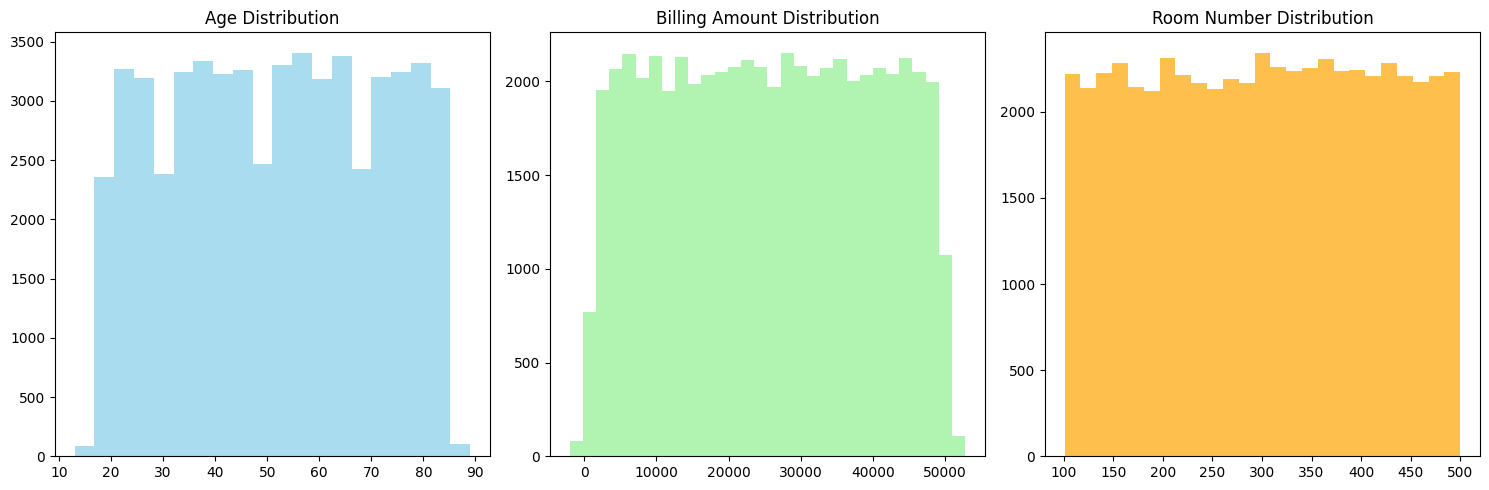

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


In [37]:
# Distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(df['Age'], bins=20, color='skyblue', alpha=0.7)
axes[0].set_title('Age Distribution')
axes[1].hist(df['Billing Amount'], bins=30, color='lightgreen', alpha=0.7)
axes[1].set_title('Billing Amount Distribution')
axes[2].hist(df['Room Number'], bins=25, color='orange', alpha=0.7)
axes[2].set_title('Room Number Distribution')
plt.tight_layout()
plt.show()

print(df[['Age', 'Billing Amount', 'Room Number']].describe())

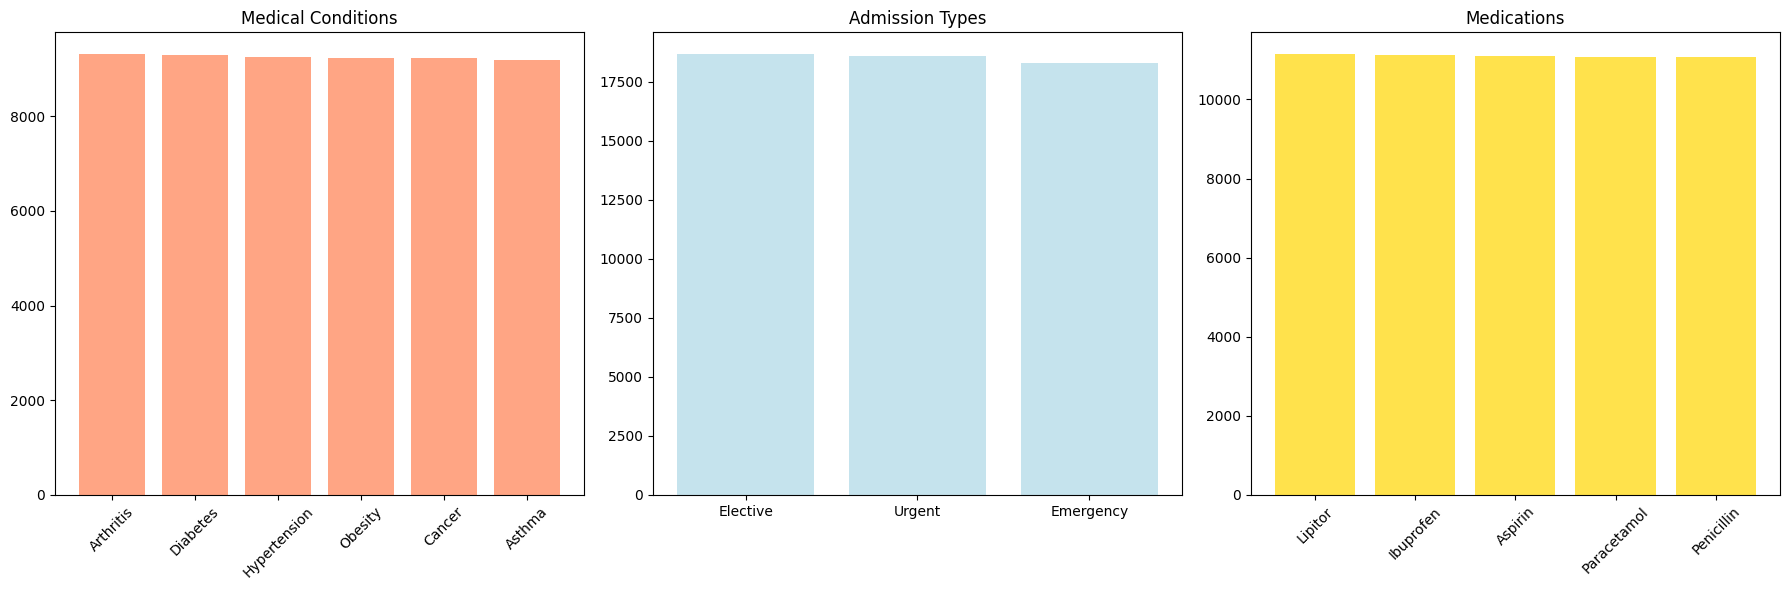

Task 1 - EDA completed!


In [38]:
# Frequencies
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

med_counts = df['Medical Condition'].value_counts()
axes[0].bar(med_counts.index, med_counts.values, color='coral', alpha=0.7)
axes[0].set_title('Medical Conditions')
axes[0].tick_params(axis='x', rotation=45)

admit_counts = df['Admission Type'].value_counts()
axes[1].bar(admit_counts.index, admit_counts.values, color='lightblue', alpha=0.7)
axes[1].set_title('Admission Types')

med_counts = df['Medication'].value_counts()
axes[2].bar(med_counts.index, med_counts.values, color='gold', alpha=0.7)
axes[2].set_title('Medications')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print('Task 1 - EDA completed!')

# Task 2 - Supervised Learning

In [39]:
# Prepare data
features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Billing Amount', 
           'Room Number', 'Admission Type', 'Medication']
X = df[features].copy()
y = df['Test Results'].copy()

print(f'Features: {features}')
print(f'Target distribution:')
print(y.value_counts())

Features: ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Billing Amount', 'Room Number', 'Admission Type', 'Medication']
Target distribution:
Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


In [40]:
# Encode categorical variables
le_dict = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# Encode target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f'Target classes: {le_target.classes_}')
print('Features encoded successfully!')

Target classes: ['Abnormal' 'Inconclusive' 'Normal']
Features encoded successfully!


In [41]:
# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f'Training set: {X_train.shape[0]} samples')
print(f'Test set: {X_test.shape[0]} samples')
print('Model trained successfully!')

Training set: 44400 samples
Test set: 11100 samples
Model trained successfully!


In [42]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)')

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.4390 (43.90%)

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.43      0.44      0.44      3754
Inconclusive       0.43      0.43      0.43      3617
      Normal       0.45      0.44      0.45      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100


Confusion Matrix:
[[1669 1053 1032]
 [1076 1550  991]
 [1101  974 1654]]


Sample Predictions vs Actual (first 20):
          Actual     Predicted
0   Inconclusive      Abnormal
1       Abnormal      Abnormal
2   Inconclusive  Inconclusive
3       Abnormal      Abnormal
4   Inconclusive  Inconclusive
5       Abnormal  Inconclusive
6   Inconclusive      Abnormal
7       Abnormal  Inconclusive
8   Inconclusive        Normal
9         Normal      Abnormal
10  Inconclusive  Inconclusive
11      Abnormal        Normal
12  Inconclusive        Normal
13  Inconclusive  Inconclusive
14      Abnormal      Abnormal
15        Normal        Normal
16      Abnormal      Abnormal
17      Abnormal      Abnormal
18        Normal  Inconclusive
19  Inconclusive      Abnormal


<Figure size 1000x600 with 0 Axes>

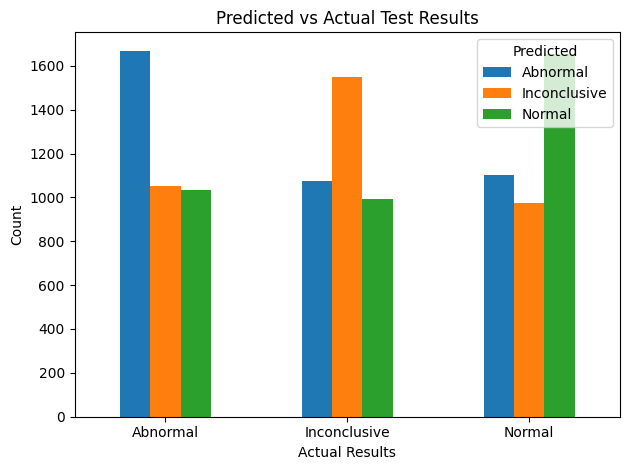

Task 2 - Supervised Learning completed!


In [43]:
# Predicted vs Actual
comparison = pd.DataFrame({
    'Actual': le_target.inverse_transform(y_test),
    'Predicted': le_target.inverse_transform(y_pred)
})

print('Sample Predictions vs Actual (first 20):')
print(comparison.head(20))

# Visualization
plt.figure(figsize=(10, 6))
comparison_counts = comparison.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)
comparison_counts.plot(kind='bar')
plt.title('Predicted vs Actual Test Results')
plt.xlabel('Actual Results')
plt.ylabel('Count')
plt.legend(title='Predicted')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print('Task 2 - Supervised Learning completed!')

# Task 3 - Unsupervised Learning

In [44]:
# Anomaly detection
billing_data = df[['Billing Amount']].copy()
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels = iso_forest.fit_predict(billing_data)

df['Is_Anomaly'] = anomaly_labels == -1
anomaly_count = df['Is_Anomaly'].sum()

print(f'Total records: {len(df):,}')
print(f'Anomalies detected: {anomaly_count:,}')
print(f'Anomaly percentage: {(anomaly_count/len(df))*100:.2f}%')

Total records: 55,500
Anomalies detected: 2,773
Anomaly percentage: 5.00%


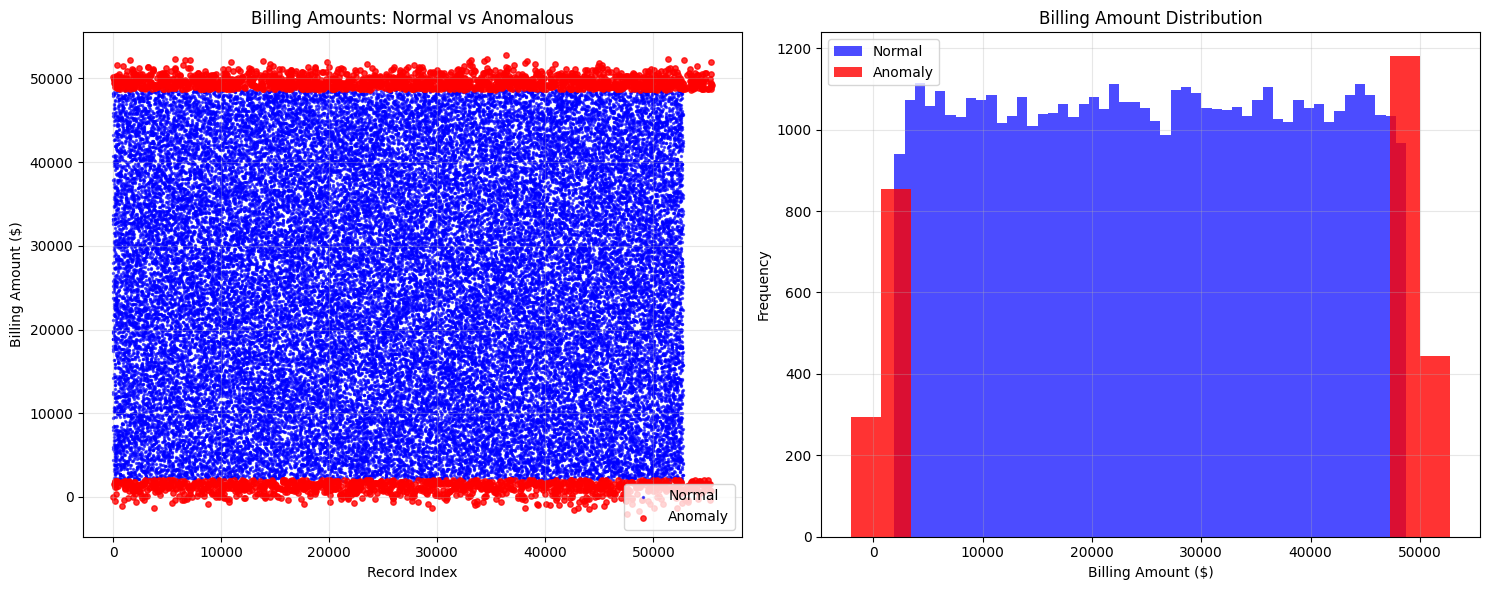

Task 3 - Unsupervised Learning completed!


In [45]:
# Visualize anomalies
normal_data = df[df['Is_Anomaly'] == False]
anomaly_data = df[df['Is_Anomaly'] == True]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
axes[0].scatter(range(len(normal_data)), normal_data['Billing Amount'], 
               c='blue', alpha=0.6, label='Normal', s=2)
axes[0].scatter(anomaly_data.index, anomaly_data['Billing Amount'], 
               c='red', alpha=0.8, label='Anomaly', s=15)
axes[0].set_title('Billing Amounts: Normal vs Anomalous')
axes[0].set_xlabel('Record Index')
axes[0].set_ylabel('Billing Amount ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(normal_data['Billing Amount'], bins=50, alpha=0.7, label='Normal', color='blue')
axes[1].hist(anomaly_data['Billing Amount'], bins=20, alpha=0.8, label='Anomaly', color='red')
axes[1].set_title('Billing Amount Distribution')
axes[1].set_xlabel('Billing Amount ($)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('Task 3 - Unsupervised Learning completed!')

# Task 4 - AI Doctor Recommendation Generator

In [46]:
def generate_doctor_recommendation(age, medical_condition, medication, predicted_result):
    """Generate AI doctor-style recommendation based on patient data"""
    
    # Base recommendation templates
    recommendations = {
        'Normal': {
            'advice': 'Your test results are within normal range. Continue your current treatment plan.',
            'follow_up': 'Schedule routine follow-up in 3-6 months.'
        },
        'Abnormal': {
            'advice': 'Your test results show abnormal values requiring immediate attention.',
            'follow_up': 'Schedule follow-up within 1-2 weeks for further evaluation.'
        },
        'Inconclusive': {
            'advice': 'Test results are inconclusive and require additional testing.',
            'follow_up': 'Repeat tests within 1 week and schedule consultation.'
        }
    }
    
    # Condition-specific advice
    condition_advice = {
        'Diabetes': 'Monitor blood sugar levels daily and maintain a balanced diet.',
        'Hypertension': 'Monitor blood pressure regularly and reduce sodium intake.',
        'Asthma': 'Keep rescue inhaler accessible and avoid known triggers.',
        'Arthritis': 'Engage in low-impact exercises and consider physical therapy.',
        'Cancer': 'Follow oncology treatment plan strictly and attend all appointments.',
        'Obesity': 'Focus on gradual weight loss through diet and exercise.'
    }
    
    # Age-specific considerations
    if age < 30:
        age_advice = 'As a young adult, focus on preventive care and healthy lifestyle habits.'
    elif age < 60:
        age_advice = 'Regular health screenings are important at your age.'
    else:
        age_advice = 'Senior health monitoring requires more frequent check-ups.'
    
    # Generate recommendation
    base_rec = recommendations.get(predicted_result, recommendations['Normal'])
    condition_rec = condition_advice.get(medical_condition, 'Follow general health guidelines.')
    
    recommendation = f"""
MEDICAL RECOMMENDATION
========================
Patient: Age {age}, Condition: {medical_condition}
Current Medication: {medication}
Predicted Test Result: {predicted_result}

CLINICAL ASSESSMENT:
{base_rec['advice']}

CONDITION-SPECIFIC GUIDANCE:
{condition_rec}

AGE-RELATED CONSIDERATIONS:
{age_advice}

NEXT STEPS:
{base_rec['follow_up']}
Continue taking {medication} as prescribed unless advised otherwise.

GENERAL RECOMMENDATIONS:
- Maintain regular exercise routine
- Follow a balanced, nutritious diet
- Get adequate sleep (7-9 hours)
- Manage stress through relaxation techniques
- Avoid smoking and limit alcohol consumption

Please consult with your healthcare provider for personalized medical advice.
"""
    
    return recommendation

print('AI Doctor Recommendation Generator created successfully!')

AI Doctor Recommendation Generator created successfully!


In [47]:
# Generate sample recommendation using test data
sample_idx = 0
test_sample = X_test.iloc[sample_idx]
actual_sample = df.iloc[X_test.index[sample_idx]]

# Get patient attributes
patient_age = actual_sample['Age']
patient_condition = actual_sample['Medical Condition']
patient_medication = actual_sample['Medication']
predicted_result = le_target.inverse_transform([y_pred[sample_idx]])[0]
actual_result = actual_sample['Test Results']

print('SAMPLE PATIENT DATA:')
print(f'Age: {patient_age}')
print(f'Medical Condition: {patient_condition}')
print(f'Medication: {patient_medication}')
print(f'Predicted Result: {predicted_result}')
print(f'Actual Result: {actual_result}')
print('\n' + '='*60)

SAMPLE PATIENT DATA:
Age: 57
Medical Condition: Diabetes
Medication: Aspirin
Predicted Result: Abnormal
Actual Result: Inconclusive



In [48]:
# Generate and display AI doctor recommendation
recommendation = generate_doctor_recommendation(
    age=patient_age,
    medical_condition=patient_condition,
    medication=patient_medication,
    predicted_result=predicted_result
)

print(recommendation)
print('\nTask 4 - AI Doctor Recommendation Generator completed!')


MEDICAL RECOMMENDATION
Patient: Age 57, Condition: Diabetes
Current Medication: Aspirin
Predicted Test Result: Abnormal

CLINICAL ASSESSMENT:
Your test results show abnormal values requiring immediate attention.

CONDITION-SPECIFIC GUIDANCE:
Monitor blood sugar levels daily and maintain a balanced diet.

AGE-RELATED CONSIDERATIONS:
Regular health screenings are important at your age.

NEXT STEPS:
Schedule follow-up within 1-2 weeks for further evaluation.
Continue taking Aspirin as prescribed unless advised otherwise.

GENERAL RECOMMENDATIONS:
- Maintain regular exercise routine
- Follow a balanced, nutritious diet
- Get adequate sleep (7-9 hours)
- Manage stress through relaxation techniques
- Avoid smoking and limit alcohol consumption

Please consult with your healthcare provider for personalized medical advice.


Task 4 - AI Doctor Recommendation Generator completed!


# Summary

In [49]:
print('ALL TASKS COMPLETED SUCCESSFULLY!')
print('=' * 50)
print(f'Task 1 - EDA: Analyzed {len(df):,} records')
print(f'Task 2 - ML: {accuracy:.2%} accuracy predicting test results')
print(f'Task 3 - Anomalies: {anomaly_count:,} billing anomalies detected')
print(f'Task 4 - AI Recommendations: Generated personalized doctor advice')
print('=' * 50)

ALL TASKS COMPLETED SUCCESSFULLY!
Task 1 - EDA: Analyzed 55,500 records
Task 2 - ML: 43.90% accuracy predicting test results
Task 3 - Anomalies: 2,773 billing anomalies detected
Task 4 - AI Recommendations: Generated personalized doctor advice
